## Descent Gradient

#### What is Descent Gradient?

Gradient descent is an optimization algorithm used to minimize the cost function by iteratively adjusting the parameters (w and b) in the direction of the steepest descent.

#### Mathematical Expressions

                𝑓𝑤,𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏    --(1)
                    
                𝐽(𝑤,𝑏)=1/2𝑚*(i=0,m-1 ∑ [𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖)]^2)    --(2)
                    
                𝑤 = 𝑤 − 𝛼*[∂𝐽(𝑤,𝑏)/∂𝑤]    --(3)
                    
                𝑏 = 𝑏 − 𝛼*[∂𝐽(𝑤,𝑏)/∂𝑏]     --(4)
                    
                [∂𝐽(𝑤,𝑏)/∂𝑤] = (1/𝑚) * i=0,m-1 ∑[(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))*𝑥(𝑖)]    --(5)
                
                [∂𝐽(𝑤,𝑏)/∂b] = (1/𝑚) * i=0,m-1 ∑[𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖)]    --(6)
                
                
                (1) - Predicted y
                (2) - Cost function
                (3) - w parameter is updated simultaneously
                (4) - b parameter is updated simultaneously
                (5) - Partial derivative of w
                (6) - Partial derivative of b
                
                Where,
                        a - learning rate

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
x = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y = np.array([250, 300, 480, 430, 630, 730])

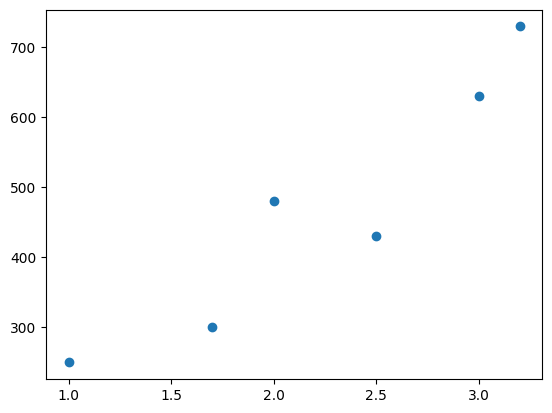

In [30]:
plt.scatter(x,y)
plt.show()

In [ ]:
### Computing Gradient

In [31]:
def gradient_function(x,y,w,b):
    
    m=x.shape[0]
    pred_y=np.zeros(m)
    
    for i in range(m):
        pred_y[i] = w*x[i]+b
     
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        dj_dw_i = (pred_y[i]-y[i])*x[i]
        dj_db_i = (pred_y[i]-y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [32]:
w=0
b=0

dw, db = gradient_function(x,y,w,b)

print(f"Gradient for w: {dw} and Gradient for b: {db}")

Gradient for w: -1170.1666666666667 and Gradient for b: -470.0


In [33]:
### Computing Gradient Descent

In [34]:
def cost_function(x,y,w,b):
    
    m = x.shape[0] #size of array
    cost_sum = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        cost = (f_wb-y[i])**2
        cost_sum = cost_sum+cost
        
    total_cost = (1/(2*m))*cost_sum
    
    return total_cost

In [35]:
def gradient_descent(x,y,w_in,b_in,a,num,gradient_function):
    w=w_in
    b=b_in
    
    for i in range(num):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        
        #values of w and b are constantly updated
        w=w-a*dj_dw 
        b=b-a*dj_db
        
    return w,b

In [36]:
a = 0.001 #learning rate
num = 1000 #number of iterations

new_w, new_b = gradient_descent(x,y,w,b,a,num, gradient_function)

print(f"New value of w: {new_w}")
print(f"New value of b: {new_b}")

New value of w: 182.53453345671545
New value of b: 67.40692553091009


In [37]:
old_cost = cost_function(x,y,w,b)
new_cost = cost_function(x,y,new_w, new_b)

print(f"Cost function with initial values of w and b: {old_cost}")
print(f"Cost function with new values of w and b: {new_cost}")

Cost function with initial values of w and b: 124800.0
Cost function with new values of w and b: 1955.8542168868646


In [38]:
m=x.shape[0]
new_pred_y = np.zeros(m)

for i in range(m):
    new_pred_y[i] = new_w * x[i] + new_b

In [39]:
plt.plot(x,pred_y)
plt.title('Linear Regression model with initial values of m and b')
plt.xlabel('Actual values of x')
plt.ylabel('Predicted values of y')
plt.show()

NameError: name 'pred_y' is not defined

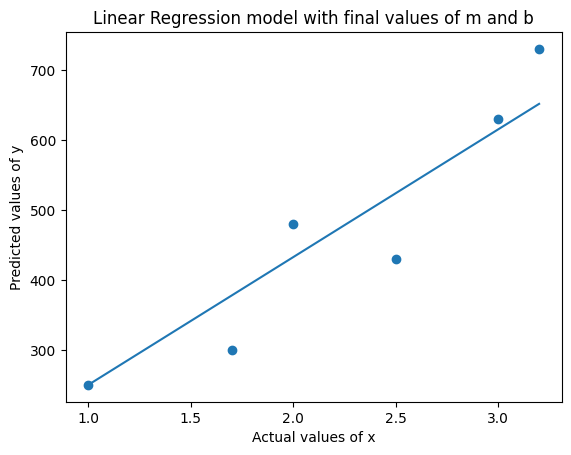

In [40]:
plt.scatter(x,y)
plt.plot(x,new_pred_y)
plt.title('Linear Regression model with final values of m and b')
plt.xlabel('Actual values of x')
plt.ylabel('Predicted values of y')
plt.show()